In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

df = pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,0,1,50002,1,50002,PITT,no_filename,1,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [56]:
df.drop(df.columns[[0,1,2,3,4,5,6]],axis=1,inplace=True)
df.head()

,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,1,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,1,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,1,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,1,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [57]:
print("Length before dropping null columns:")
print(len(df))
print("Length after dropping null columns:")
df=df.dropna()
print(len(df))

Length before dropping null columns:
1112
Length after dropping null columns:
1099


In [58]:
X = df.drop('DX_GROUP', axis=1).copy()
X.head()

,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [59]:
y = df['DX_GROUP'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DX_GROUP, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [61]:
clf_svm = SVC(random_state=43)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=43)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


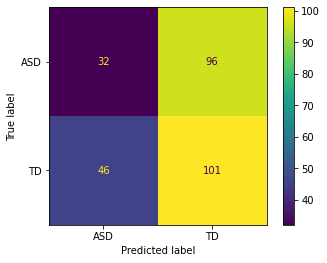

In [62]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=["ASD","TD"])

In [63]:
param_grid = [
{'C': [0.5, 1, 10, 100],
 'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
 SVC(),
 param_grid,
 cv=5,
 scoring='accuracy',
 verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [64]:
clf_svm = SVC(random_state=43, C=1, gamma=0.1)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.1, random_state=43)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


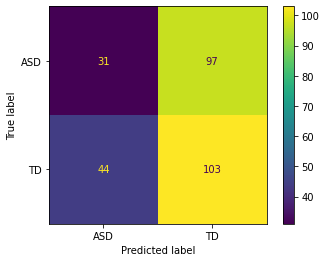

In [65]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=["ASD","TD"])

In [66]:
from sklearn.metrics import classification_report

y_predict = clf_svm.predict(X_test_scaled)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.41      0.24      0.31       128
           2       0.52      0.70      0.59       147

    accuracy                           0.49       275
   macro avg       0.46      0.47      0.45       275
weighted avg       0.47      0.49      0.46       275

